### FULL NAME: NGUYEN VO NGOC BAO
### STUDENT ID: 23520131

In [323]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [324]:
# load package for loading data
import pandas as pd

In [325]:
housing_dataset = pd.read_csv('boston_housing.csv')
housing_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [326]:
X = housing_dataset['RM']
y = housing_dataset['MEDV']

In [327]:
# load package for spliting data
from sklearn.model_selection import train_test_split

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Visualization

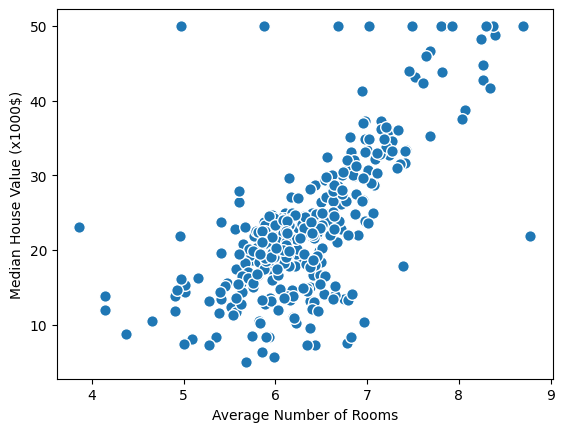

In [329]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.show()

### Linear Regression (Base)

In [330]:
def BaseLinearRegression(X, y):
    try:
        theta = np.linalg.solve(np.dot(np.transpose(X), X), np.dot(np.transpose(X), y))
        return theta
    except np.linalg.LinAlgError:
        return None

### Gradient Descent

In [331]:
class GradientDescent():
    def __init__(self, eta = 1e-7, num_iter = 200, ran_state = 42):
        self.eta = eta
        self.num_iter = num_iter
        np.random.seed(ran_state)
    def fit(self, X, y):
        n = X.shape[0]
        if (len(X.shape)==1): X = np.expand_dims(X,axis=-1)
        self.weight = np.random.random(X.shape[1])
        self.bias = np.random.random(1)
        self.costs = np.full(self.num_iter,1e9)
        for iteration in range(self.num_iter):
            y_train_pred = X.dot(self.weight)+self.bias
            grad_w = 2/n*X.T.dot(y_train_pred-y)
            grad_b = np.mean(2*(y_train_pred-y))
            self.weight -= self.eta*grad_w
            self.bias -= self.eta*grad_b
            self.costs[iteration] = ((X.dot(self.weight)+self.bias-y)**2).sum()
            if self.costs[iteration]>=1e9: 
                self.costs[iteration] = 1e9
                break
    @property
    def w(self):
        return np.concatenate((self.weight,self.bias))
    def predict(self, X):
        if (len(X.shape)==1): X = np.expand_dims(X,axis=-1)
        return X.dot(self.weight)+self.bias

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

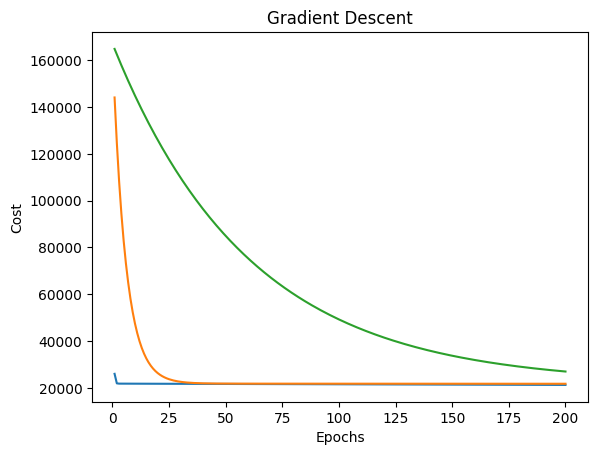

In [332]:
# Initialize the model
for eta in [1e-2, 1e-3, 1e-4]:
    reg_GD = GradientDescent(eta=eta)

    # Train model
    reg_GD.fit(X_train, y_train)

    # Visualize the cost trend
    plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Gradient Descent')

plt.show()

# eta = 1e-2 is the best choice
reg_GD = GradientDescent(eta=1e-2)
reg_GD.fit(X_train, y_train)

Visualize the prediction of Gradient Descent model on Training Data

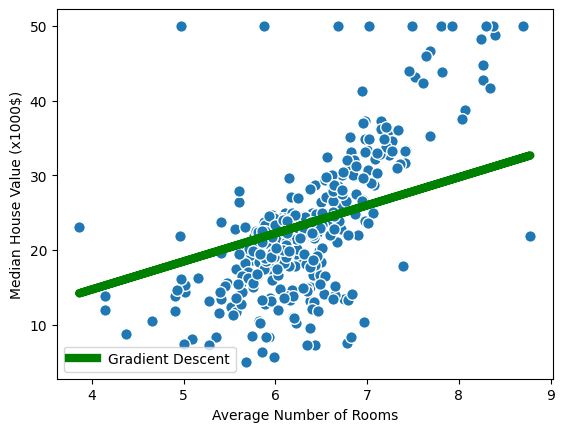

In [333]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [334]:
class StochasticGradientDescent():
    def __init__(self, eta=1e-4, num_iter=200, ran_state=42):
        self.eta = eta
        self.num_iter = num_iter
        np.random.seed(ran_state)
    def fit(self, X, y):
        n = X.shape[0]
        y = np.array(y)
        if (len(X.shape)==1): X = np.expand_dims(X,axis=-1)
        self.costs = np.full(self.num_iter, np.inf)
        self.weight = np.random.random(X.shape[1])
        self.bias = np.random.random(1)
        for iteration in range(self.num_iter):
            for i in range(n):
                y_train_pred = X[i].dot(self.weight)+self.bias
                grad_w = 2*X[i]*(y_train_pred-y[i])
                grad_b = 2*(y_train_pred-y[i])
                self.weight -= self.eta*grad_w
                self.bias -= self.eta*grad_b
                self.costs[iteration] = ((X[i].dot(self.weight)+self.bias-y)**2).sum()
                if np.isinf(self.costs[iteration]): 
                    break
    @property
    def w(self):
        return np.concatenate((self.weight,self.bias))
    def predict(self, X):
        if (len(X.shape)==1): X = np.expand_dims(X,axis=-1)
        return X.dot(self.weight)+self.bias

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [335]:
# Initialize the model
reg_SGD = StochasticGradientDescent(eta=1e-4)

# Train model
reg_SGD.fit(X_train, y_train)

Visualize the prediction of Stochastic Gradient Descent model on Training Data

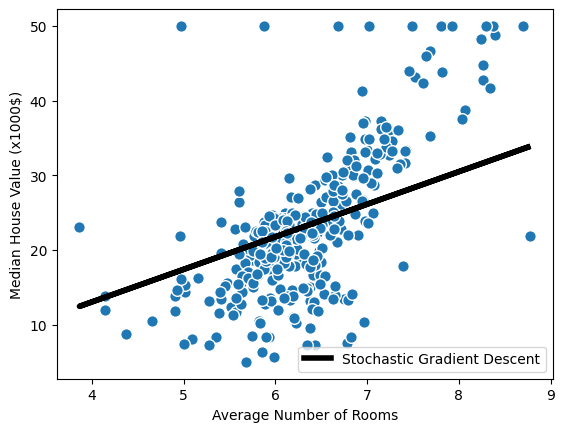

In [336]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [337]:
from sklearn.linear_model import LinearRegression

class NormalEquation(LinearRegression):
    def __init__(self):
        super().__init__()
        
    def fit(self, X, y):
        if (len(X.shape)==1): X = np.array(X).reshape(-1, 1)
        super().fit(X, y)
        
    def predict(self, X):
        if (len(X.shape)==1): X = np.array(X).reshape(-1, 1)
        return super().predict(X)
    
    @property
    def w(self):
        return np.concatenate((self.coef_,np.array([self.intercept_]) ))

In [338]:
# Intialize the Normal Equation model
reg_NE = NormalEquation()

# Train model
reg_NE.fit(X_train, y_train)

Visualize the prediction of Normal Equation model on Training Data

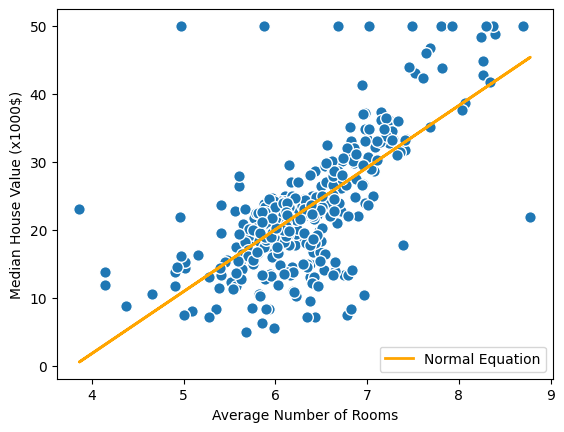

In [339]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

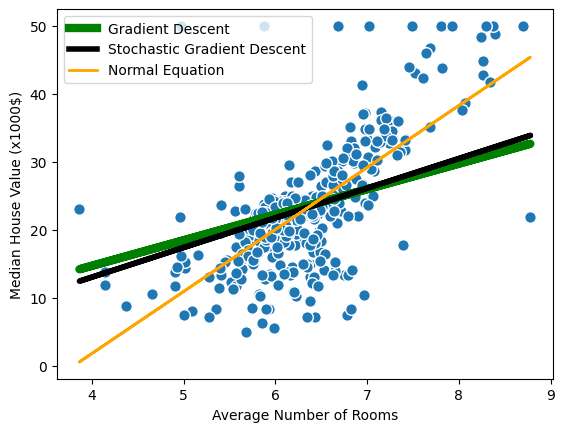

In [340]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [341]:
w_GD = reg_GD.w
w_SGD = reg_SGD.w
w_NE = reg_NE.w
print(w_GD)
print(w_SGD)
print(w_NE)

[ 3.75563286 -0.3143531 ]
[ 4.360564   -4.40276882]
[  9.1181022  -34.66230744]


Performance Comparisons (on Testing Set)

In [342]:
y_pred_GD = reg_GD.predict(X_test)

In [343]:
y_pred_SGD = reg_SGD.predict(X_test)

In [344]:
y_pred_NE = reg_NE.predict(X_test)

In [345]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [346]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 5.377727
MAE of SGD: 5.130342
MAE of NE: 4.314224


In [347]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 54.127701
MSE of SGD: 50.66489
MSE of NE: 40.35145


In [348]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.273581
R2 of SGD: 0.320054
R2 of NE: 0.458465


## Experiment with Standardized Data

In [349]:
# Re-load the dataset
housing_dataset = pd.read_csv('boston_housing.csv')

In [350]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [351]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [352]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset['RM']
y = housing_dataset['MEDV']

In [353]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

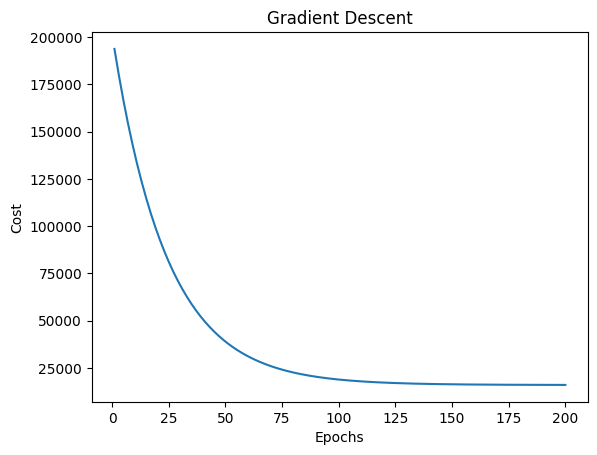

In [354]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = GradientDescent(eta=1e-2)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



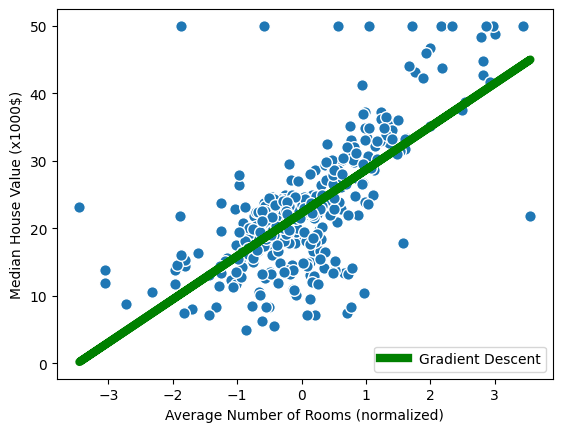

In [355]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [356]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = StochasticGradientDescent(eta=1e-3)

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

Visualize the prediction of Stochastic Gradient Descent model on Training Data


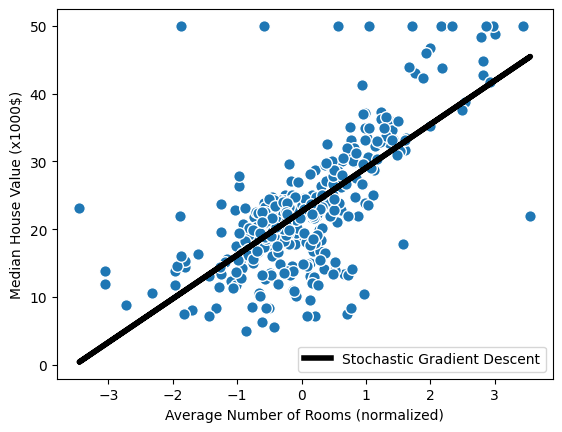

In [357]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [358]:
# Initalize the Normal Equation model
reg_NE = NormalEquation()

# Train model
reg_NE.fit(X_train_norm, y_train)

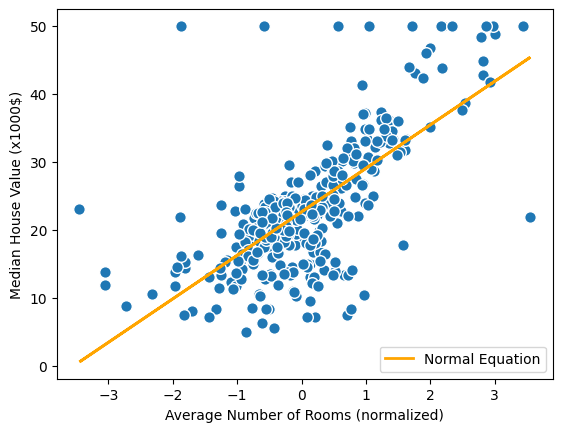

In [359]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

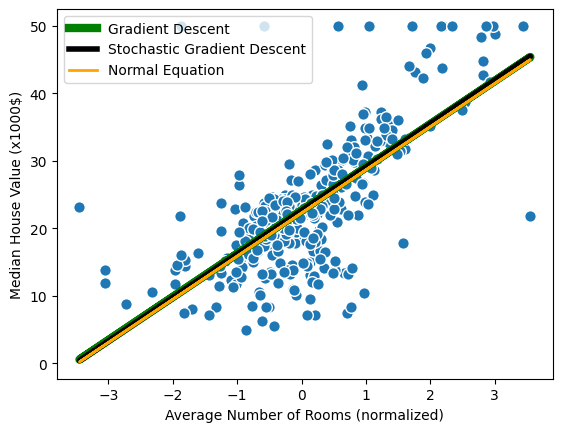

In [360]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [361]:
w_GD = reg_GD.w
w_GD

array([ 6.39437888, 22.2730622 ])

In [362]:
w_SGD = reg_SGD.w
w_SGD

array([ 6.43502429, 22.59905782])

In [363]:
w_NE = reg_NE.w
w_NE

array([ 6.40020122, 22.64163118])

In [364]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [365]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [366]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [367]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 4.302266
MAE of SGD: 4.309515
MAE of NE: 4.314224


In [368]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 40.219259
MSE of SGD: 40.326493
MSE of NE: 40.35145


In [369]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.460239
R2 of SGD: 0.4588
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [370]:
# Re-load dataset
housing_dataset = pd.read_csv('boston_housing.csv')

* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [371]:
X = housing_dataset.drop(columns=['MEDV']).values
y = housing_dataset['MEDV']

In [372]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

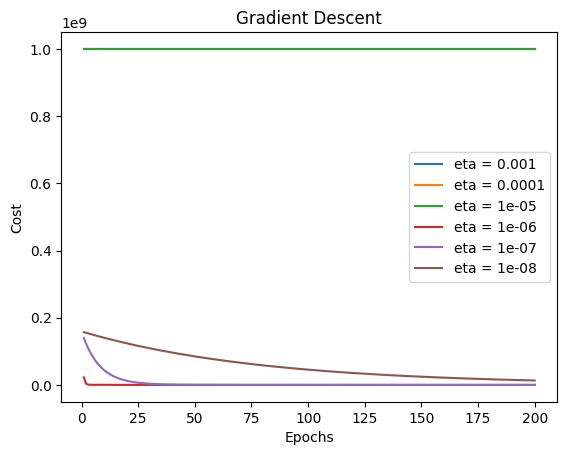

In [373]:
# Initalize the GD model
for eta in [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]:
    reg_GD = GradientDescent(eta=eta)

    # Train model
    reg_GD.fit(X_train, y_train)

    # Visualize the cost trend
    plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, label=f'eta = {eta}')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

# eta = 1e-6 is the best choice
reg_GD = GradientDescent(1e-6)
reg_GD.fit(X_train, y_train)

### Stochastic Gradient Descent

In [374]:
# Initialize the SGD model
reg_SGD = StochasticGradientDescent(eta=1e-8)

# Train model
reg_SGD.fit(X_train, y_train)

### Normal Equation

In [375]:
# Add the '1' column to data
def add1Column(arr):
    oneColumns = np.ones(arr.shape[0], 1)
    return np.hstack(oneColumns, arr)

In [376]:
# Intialize the NE model
reg_NE = NormalEquation()

# Train model
reg_NE.fit(X_train, y_train)

### Algorithms Comparisons

In [377]:
w_GD = reg_GD.w
w_GD

array([ 0.36131564,  0.78950999,  0.71939987,  0.59878019,  0.15500425,
        0.1425021 , -0.02015008,  0.84867001,  0.58863131, -0.05538733,
       -0.01982708,  0.02533509,  0.79517154,  0.21004079])

In [378]:
w_SGD = reg_SGD.w
w_SGD

array([ 0.33182987,  0.57506312,  0.72488905,  0.59947466,  0.15523782,
        0.14722567,  0.05403208,  0.83697204,  0.58836776, -0.06635078,
       -0.01864353,  0.03241688,  0.75126691,  0.21015474])

In [379]:
w_NE = reg_NE.w
w_NE

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01,  3.16310840e+01])

In [380]:
y_pred_GD = reg_GD.predict(X_test)

In [381]:
y_pred_SGD = reg_SGD.predict(X_test)

In [382]:
y_pred_NE = reg_NE.predict(X_test)

In [383]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 13.215056
MAE of SGD: 10.974848
MAE of NE: 3.16271


In [384]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 337.861637
MSE of SGD: 209.17495
MSE of NE: 21.517444


In [385]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -3.534259
R2 of SGD: -1.807224
R2 of NE: 0.711226


## Experiment with Standardized Data

In [386]:
# Re-load dataset
housing_dataset = pd.read_csv('boston_housing.csv')

In [387]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [388]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [389]:
X_new = housing_dataset.drop(columns=['MEDV']).values
y = housing_dataset['MEDV']

In [390]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, train_size=42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

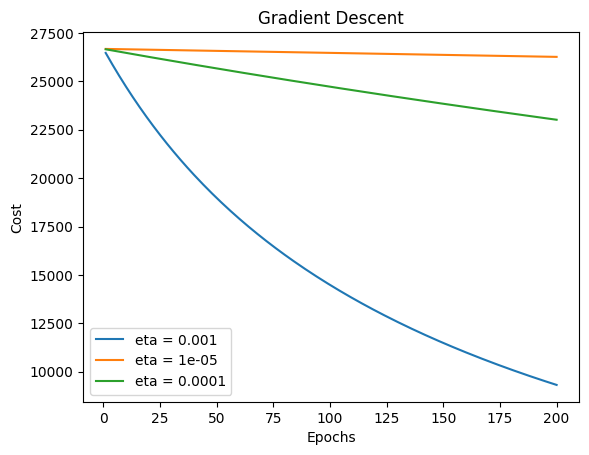

In [391]:
# Initalize the GD model
for eta in [1e-3, 1e-5, 1e-4]:
    reg_GD = GradientDescent(eta=eta)

    # Train model on normalized data
    reg_GD.fit(X_train_norm, y_train)

    # Visualize the cost trend
    plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, label=f'eta = {eta}')
    
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

# ==> eta = 1e-4 is the decent choice
reg_GD = GradientDescent(eta=1e-4)
reg_GD.fit(X_train_norm, y_train)

### Stochastic Gradient Descent

In [392]:
# Initialize SGD model (eta0=1e-7, max_iter=200, random_state=42, learning_rate='constant')
from sklearn.linear_model import SGDRegressor
reg_SGD = SGDRegressor(eta0=1e-7, max_iter=200, random_state=42, learning_rate='constant')

# Train model
reg_SGD.fit(X_train_norm, y_train)

/Users/home/Documents/University Miscellaneous/Học kỳ 3/Toán cho KHMT/Assignments/Assignment 2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=1e-07, learning_rate='constant', max_iter=200,
             random_state=42)

### Normal Equation (sklearn)

In [393]:
# Initialize NE model
reg_NE = NormalEquation()

# Train model
reg_NE.fit(X_train_norm, y_train)

### Algorithms Comparisons

In [394]:
w_GD = reg_GD.w
w_GD

array([ 0.24583218,  1.1060139 ,  0.29879714,  0.57539364, -0.17079887,
        0.43384458, -0.07958001,  1.02512127,  0.27768353,  0.26364577,
       -0.1433441 ,  1.1979914 ,  0.52081674,  1.10930469])

In [395]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([ 1.93841061e-02, -1.89405695e-03,  4.44671849e-03, -9.06867133e-03,
       -9.25248525e-05, -7.14179497e-03,  5.86878250e-03, -3.01776860e-03,
        3.87088629e-03, -6.64007184e-03, -9.19215115e-03, -3.85426140e-03,
        5.34167936e-03, -6.25536203e-03])

In [396]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.70624604, -0.88696822, -0.06345488, -2.50938598,  0.53626885,
       -0.15479427,  2.77326469, -0.97479589, -2.35587818,  1.74271412,
       -1.52438232, -3.25492374,  0.63186078, -2.23448668])

In [397]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [398]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [399]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [400]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 21.687698
MAE of SGD: 22.640743
MAE of NE: 3.739558


In [401]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 533.572275
MSE of SGD: 583.65672
MSE of NE: 31.859023


In [402]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -6.464341
R2 of SGD: -7.164991
R2 of NE: 0.554312


# Explain what $R^2$ coefficient is.

The $R^2$ coefficient is a statistical measure that represents the proportion of the variance for a dependent variable that is explained by an independent variable or variables in a regression model. It is commonly used in linear regression and is one way to evaluate the performance of a model.

## $R^2$ (R-quared)
- **Definition**: $R^2$ measures the goodness of fit of a model, showing how well the model's predictions match the actual data.
- **Formula**: The $R^2$ value is calculated as:
  $
  R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
  $ where:
  - $ \text{SS}_{\text{res}} $ is the *sum of squares of residuals* (i.e., the variance of the prediction errors).
  - $ \text{SS}_{\text{tot}} $ is the *total sum of squares* (i.e., the variance of the observed data around its mean).

- **Interpretation**:
  - $ R^2 = 1 $: The model perfectly predicts all outcomes, meaning it explains 100% of the variance in the data.
  - $ R^2 = 0 $: The model does not explain any of the variance; predictions are no better than the mean of the observed data.
  - $ 0 < R^2 < 1 $: The model explains some but not all of the variance, indicating partial fit.